## Preprocessing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.utils import resample
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.neural_network import MLPClassifier

# Get Df
df = pd.read_csv('secondary_data.csv', header=None)

# Split the first row to create column names
columns = df.iloc[0][0].split(';')

# Drop the original column with combined values
df.drop(0, axis=0, inplace=True)
# Split the values in the remaining rows based on the semicolon (;) delimiter
df = df.iloc[:, 0].str.split(';', expand=True).convert_dtypes()
# Set the extracted column names
df.columns = columns
 # Print the updated DataFrame
df['cap-diameter'] = df['cap-diameter'].astype(float)
df['stem-height'] = df['stem-height'].astype(float)
df['stem-width'] = df['stem-width'].astype(float)

# df
# df = df[df[0] != 'e']
X = df[df.columns[1:]]
y = df[[df.columns[0]]]


float_columns = X.select_dtypes(include='float').columns
df_floats = X[float_columns]
X_only_categorical_cols = X.drop(float_columns, axis=1)
X_only_categorical_cols

X_one_hotted = pd.get_dummies(X, columns = X_only_categorical_cols.columns)
X_one_hotted

X_train, X_test, y_train, y_test = train_test_split(X_one_hotted, y, test_size=0.2, random_state=42)

## Baseline

56% Accuracy on the test set after training on 80% of the data set

In [ ]:
# Find the most common class in the training set

baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
test_report = classification_report(y_test, y_pred_baseline)

# Evaluate the baseline model

print(test_report)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
              precision    recall  f1-score   support

           e       0.00      0.00      0.00      5374
           p       0.56      1.00      0.72      6840

    accuracy                           0.56     12214
   macro avg       0.28      0.50      0.36     12214
weighted avg       0.31      0.56      0.40     12214

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.

## Boosted Tree 

93% Accuracy on the test set after trying a second boosted classifier

In [ ]:
model2 = GradientBoostingClassifier(random_state=42)
model2.fit(X_train, y_train)
y_test_pred = model2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
print(f"Model 2: Boosted Tree Performance on Test Set\nAccuracy: {test_accuracy}\nClassification Report:\n{test_report}\n")


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Model 2: Boosted Tree Performance on Test Set
Accuracy: 0.9320451940396267
Classification Report:
              precision    recall  f1-score   support

           e       0.92      0.92      0.92      5374
           p       0.94      0.94      0.94      6840

    accuracy                           0.93     12214
   macro avg       0.93      0.93      0.93     12214
weighted avg       0.93      0.93      0.93     12214




## Neural Network (MLP Classifier)

In [ ]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation = "logistic",
    max_iter=200,
    solver='lbfgs',
    verbose=1,
    random_state=42,
)
X_one_hotted
# y

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
1,15.26,16.95,17.09,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,16.60,17.99,18.19,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,14.07,17.80,17.74,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,14.17,15.77,15.98,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,14.64,16.53,17.20,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61065,1.18,3.93,6.22,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
61066,1.27,3.18,5.43,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
61067,1.27,3.86,6.37,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
61068,1.24,3.56,5.44,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
classifier.fit(X_train, y_train)
y_hat = classifier.predict(X_test)


# X_train

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1301     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.01928D-01    |proj g|=  2.35138D-01
 This problem is unconstrained.

At iterate    1    f=  7.06934D-01    |proj g|=  7.37336D-02

At iterate    2    f=  6.97426D-01    |proj g|=  3.58477D-02

At iterate    3    f=  6.81626D-01    |proj g|=  2.19846D-02

At iterate    4    f=  6.70013D-01    |proj g|=  1.32540D-02

At iterate    5    f=  6.62785D-01    |proj g|=  3.68890D-02

At iterate    6    f=  6.57434D-01    |proj g|=  1.51872D-02

At iterate    7    f=  6.54502D-01    |proj g|=  8.26964D-03

At ite

In [ ]:
test_accuracy = accuracy_score(y_test, y_hat)
test_report = classification_report(y_test, y_hat)
print(f"Model 1: MLP Performance on Test Set\nAccuracy: {test_accuracy}\nClassification Report:\n{test_report}\n")

Model 1: MLP Performance on Test Set
Accuracy: 0.9795316849516947
Classification Report:
              precision    recall  f1-score   support

           e       1.00      0.96      0.98      5374
           p       0.97      1.00      0.98      6840

    accuracy                           0.98     12214
   macro avg       0.98      0.98      0.98     12214
weighted avg       0.98      0.98      0.98     12214




98% Accuracy on the test set after training on 80% of the data set

## Vanilla Bagging (Random Forest)

In [ ]:
#Vanilla Bagging
from sklearn.ensemble import RandomForestClassifier

#num_feature will be equal to the # of features in the train df
num_feature = len(X_train.columns)

model3 = RandomForestClassifier(random_state=42, max_features = num_feature)
model3.fit(X_train, y_train)
y_test_pred_3 = model3.predict(X_test)
test_accuracy_3 = accuracy_score(y_test, y_test_pred_3)
test_report_3 = classification_report(y_test, y_test_pred_3)

print(f"Model 3: Vanilla RF Classifier Performance on Test Set\nAccuracy: {test_accuracy_3}\nClassification Report:\n{test_report_3}\n")


Model 3: Vanilla RF Classifier Performance on Test Set
Accuracy: 0.9994268871786475
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5550
           1       1.00      1.00      1.00      6664

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214




In [ ]:
print(test_accuracy_3)

0.9994268871786475


## Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


secondary = pd.read_csv('secondary_data.csv', sep=';')


def process(df):
    
    
    sc = StandardScaler()
    ohe = OneHotEncoder(sparse=False)

    df.select_dtypes(include=object)
    
    df_sc = sc.fit_transform(df.select_dtypes(include=(float, int)))
    df_sc = pd.DataFrame(df_sc, columns=sc.get_feature_names_out())
    
    df_ohe = ohe.fit_transform(df.select_dtypes(include=object))
    df_ohe = pd.DataFrame(df_ohe, columns=ohe.get_feature_names_out())
    
    return pd.merge(df_sc, df_ohe, left_index=True, right_index=True)

X_train, X_test, y_train, y_test = train_test_split(secondary.drop('class', axis=1), secondary['class'], test_size=.2)

X_train = process(X_train)
y_train = y_train.replace({'e' : 0, 'p' : 1}).reset_index(drop='index')

X_test = process(X_test)
y_test = y_test.replace({'e' : 0, 'p' : 1}).reset_index(drop='index')


In [ ]:
model = RandomForestClassifier(max_features=1, n_estimators=800, max_depth=100, verbose=2, random_state=42)

model.fit(X_train, y_train)

pred = model.predict(X_test)

accuracy = accuracy_score(y_test, pred)
test_report = classification_report(y_test, pred)
print(f"Accuracy: {accuracy}\nClassification Report:\n{test_report}\n")

/tmp/ipykernel_40/1300211189.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 1 of 800
building tree 2 of 800
building tree 3 of 800
building tree 4 of 800
building tree 5 of 800
building tree 6 of 800
building tree 7 of 800
building tree 8 of 800
building tree 9 of 800
building tree 10 of 800
building tree 11 of 800
building tree 12 of 800
building tree 13 of 800
building tree 14 of 800
building tree 15 of 800
building tree 16 of 800
building tree 17 of 800
building tree 18 of 800
building tree 19 of 800
building tree 20 of 800
building tree 21 of 800
building tree 22 of 800
building tree 23 of 800
building tree 24 of 800
building tree 25 of 800
building tree 26 of 800
buil

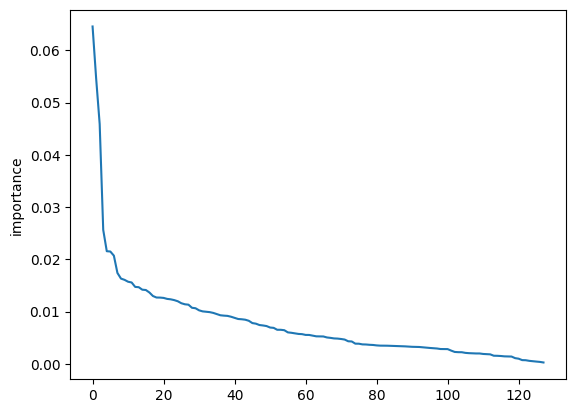

In [ ]:
import matplotlib.pyplot as plt

analysis_rf = pd.DataFrame(model.feature_importances_).rename({0 : 'importance'}, axis=1)
analysis_rf.loc[:, 'columns'] = X_train.columns
analysis_rf = analysis_rf.sort_values('importance', ascending=False)
sns.lineplot(analysis_rf, x=np.arange(0,128,1), y='importance');
plt.xlabel('rank')

In [ ]:
from sklearn.neural_network import MLPClassifier

model2 = MLPClassifier(hidden_layer_sizes=(10,),
                       activation = "logistic",
                       max_iter=200,
                       solver='lbfgs',
                       verbose=1,
                       random_state=42,
                       )
model2.fit(X_train, y_train)

pred = model2.predict(X_test)

accuracy = accuracy_score(y_test, pred)
test_report = classification_report(y_test, pred)
print(f"Accuracy: {accuracy}\nClassification Report:\n{test_report}\n")

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         1301     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.01928D-01    |proj g|=  2.35138D-01
 This problem is unconstrained.

At iterate    1    f=  7.06934D-01    |proj g|=  7.37336D-02

At iterate    2    f=  6.97426D-01    |proj g|=  3.58477D-02

At iterate    3    f=  6.81626D-01    |proj g|=  2.19846D-02

At iterate    4    f=  6.70013D-01    |proj g|=  1.32540D-02

At iterate    5    f=  6.62785D-01    |proj g|=  3.68890D-02

At iterate    6    f=  6.57434D-01    |proj g|=  1.51872D-02

At iterate    7    f=  6.54502D-01    |proj g|=  8.26964D-03

At ite

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=10000, random_state=42)

model_lr.fit(X_train, y_train)

pred = model_lr.predict(X_test)

accuracy = accuracy_score(y_test, pred)
test_report = classification_report(y_test, pred)
print(f"Accuracy: {accuracy}\nClassification Report:\n{test_report}\n")

Accuracy: <function accuracy_score at 0x7f5569dbb3a0>
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5550
           1       0.87      0.87      0.87      6664

    accuracy                           0.86     12214
   macro avg       0.86      0.86      0.86     12214
weighted avg       0.86      0.86      0.86     12214




## Results

In [1]:
import pandas as pd
comparison_data = {
    'Baseline': [0.56,1, 0.72], 
    'MLP Classifier': [0.979449,1.00, 0.98],
    'Boosted Tree': [0.932045,0.94, 0.94],
    'Logistic Regression': [0.86,0.87, 0.87],
    'Random Forest': [1.00,1.00, 1.00]

}

comparison_table = pd.DataFrame(data=comparison_data, index=['Precision','Recall', 'F1-score']).transpose()
comparison_table.style.set_properties(**{'font-size': '12pt'}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])

,Precision,Recall,F1-score
Baseline,0.560000,1.000000,0.720000
MLP Classifier,0.979449,1.000000,0.980000
Boosted Tree,0.932045,0.940000,0.940000
Logistic Regression,0.860000,0.870000,0.870000
Random Forest,1.000000,1.000000,1.000000


In [ ]:
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df[1:10])

           Feature  Importance
0     cap-diameter    0.054609
1      stem-height    0.045532
86    stem-color_w    0.025480
45  gill-spacing_c    0.021237
66   stem-surface_    0.021215
44   gill-spacing_    0.020742
58    gill-color_w    0.018048
9      cap-shape_x    0.016393
46  gill-spacing_d    0.016110


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f7cdad6d-3f85-4d48-b2ca-de682333b284' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>